# Principal component analysis

We use here PCA to perform dimensionality reduction, first to explore how the method works and how well its perform in compressing the data at hand; and then whether it is a useful preprocessing of other learning algorithms (here, logistic regression).

**There are 5 questions to answer.**

In [1]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# set up the random number generator: given seed for reproducibility, None otherwise
# (see https://numpy.org/doc/stable/reference/random/generator.html#numpy.random.default_rng)
my_seed = 1
rng = np.random.default_rng(seed=my_seed) 

## Loading the MNIST dataset

we consider performing PCA on the standard MNIST dataset already encountered in few times in the hands-on.

In [2]:
# load data from Keras, values between 0 and 255 initially
(x_train_full, y_train_full), (x_test_full, y_test_full) = tf.keras.datasets.mnist.load_data()
print('initial data type for images = ',x_train_full.dtype,', initial data shape = ',x_train_full.shape)
print('initial data type for labels = ',y_train_full.dtype,', initial label shape = ',y_train_full.shape,'\n')
    
# renormalize to have data between 0 and 1; could alternatively use built-in rescaling function
# such as https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
x_train_full = x_train_full/255. 
x_test_full = x_test_full/255.
print('Train set: data set size =',x_train_full.shape[0])
print('Test set:  data set size =',x_test_full.shape[0])

# reshape the data points, which are 28x28 tensors, into a single vector of size 28x28=784
x_train_full = x_train_full.reshape((x_train_full.shape[0], 784))
x_test_full = x_test_full.reshape((x_test_full.shape[0], 784))

# shuffle data
indices = np.random.permutation(x_train_full.shape[0])
x_train_full = x_train_full[indices]
y_train_full = y_train_full[indices]
indices = np.random.permutation(x_test_full.shape[0])
x_test_full = x_test_full[indices]
y_test_full = y_test_full[indices]

initial data type for images =  uint8 , initial data shape =  (60000, 28, 28)
initial data type for labels =  uint8 , initial label shape =  (60000,) 

Train set: data set size = 60000
Test set:  data set size = 10000


We can plot the first elements of the resulting data set in order to see what they looks like, in particular when binarization is performed.

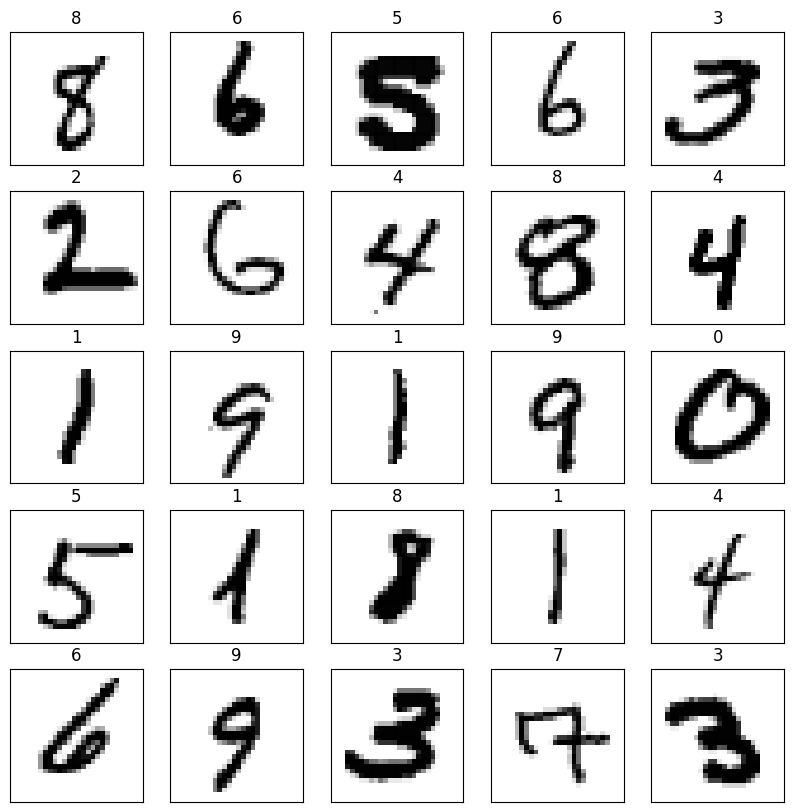

In [3]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # color map = binary, other choices here https://matplotlib.org/stable/tutorials/colors/colormaps.html
    plt.imshow(x_train_full[i].reshape(28,28), cmap=plt.cm.binary)     
    plt.title(y_train_full[i])
plt.show()

## Performing PCA

We use the PCA as implemented in scikit-learn https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html, see also https://scikit-learn.org/stable/modules/decomposition.html#pca

In [4]:
# importing the required class
from sklearn import decomposition

# initializing the pca
pca = decomposition.PCA()
pca.n_components = 784
pca_data = pca.fit_transform(x_train_full)

We can then plot the various eigenvalues of the empirical covariance, and the percentage of the explained variance as a function of the eigenvalue number.

**Question 1.** Compute the cumulative sum of the percentage of explained variance (which should end up at 1 for the maximal number of components).

In [13]:
cum_var_explained = np.cumsum(pca.explained_variance_ratio_)
cum_var_explained

array([0.09704664, 0.16800588, 0.22969677, 0.28359097, 0.33227894,
       0.37540125, 0.40812055, 0.4369595 , 0.4645798 , 0.4881498 ,
       0.5092417 , 0.52947161, 0.54662979, 0.56355091, 0.57933732,
       0.59416685, 0.60741246, 0.62018143, 0.63205406, 0.6435809 ,
       0.65424256, 0.66430969, 0.67384542, 0.68297086, 0.69180491,
       0.7001981 , 0.70832389, 0.71618755, 0.72363488, 0.73054347,
       0.73712441, 0.74360589, 0.74963204, 0.75549786, 0.76119807,
       0.76663435, 0.77169222, 0.7765708 , 0.7813851 , 0.78610776,
       0.79067523, 0.79512359, 0.7993086 , 0.80329076, 0.8071405 ,
       0.81089154, 0.81451162, 0.81802754, 0.82142812, 0.82464686,
       0.82783703, 0.83096508, 0.83392491, 0.83681446, 0.83965576,
       0.84237012, 0.84506533, 0.84765006, 0.85018776, 0.85263557,
       0.85504063, 0.85743326, 0.85973735, 0.86195267, 0.86408988,
       0.86616213, 0.86819256, 0.87016038, 0.87208891, 0.87397523,
       0.875845  , 0.87765583, 0.87943146, 0.88118044, 0.88283

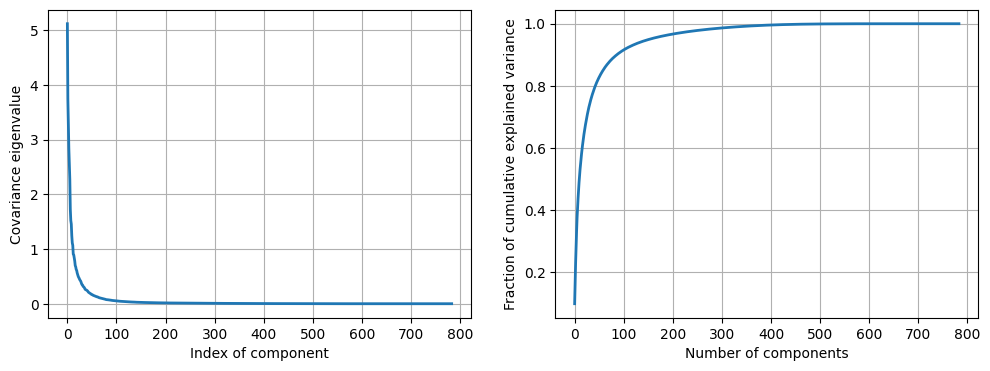

In [18]:
# Plot the PCA spectrum
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12, 4))
ax1.plot(pca.explained_variance_, linewidth=2)
# ax1.semilogy(pca.explained_variance_, linewidth=2)
ax1.grid()
ax1.set_xlabel('Index of component')
ax1.set_ylabel('Covariance eigenvalue')
ax2.plot(cum_var_explained, linewidth=2)
ax2.grid()
ax2.set_xlabel('Number of components')
ax2.set_ylabel('Fraction of cumulative explained variance')
plt.show()

**Question 2.** Write a function which gives the number of components required to attain a certain percentage of the total variance. How many components are needed to retrieve 50% of the total variance? 80%?

In [20]:
def nb_components(cum_var_explained, percentage):
    return np.argmax(cum_var_explained > percentage)

In [21]:
n_components_50 = nb_components(cum_var_explained, 0.5)
print('Number of components to keep 50% of the variance =',n_components_50)

n_components_80 = nb_components(cum_var_explained, 0.8)
print('Number of components to keep 80% of the variance =',n_components_80)

Number of components to keep 50% of the variance = 10
Number of components to keep 80% of the variance = 43


We next study what images look like when dimensionality reduction is performed.

**Question 3.** Complete the code below to perform PCA with a decreasing number of components, as given by the vector *vector_of_index_values*.

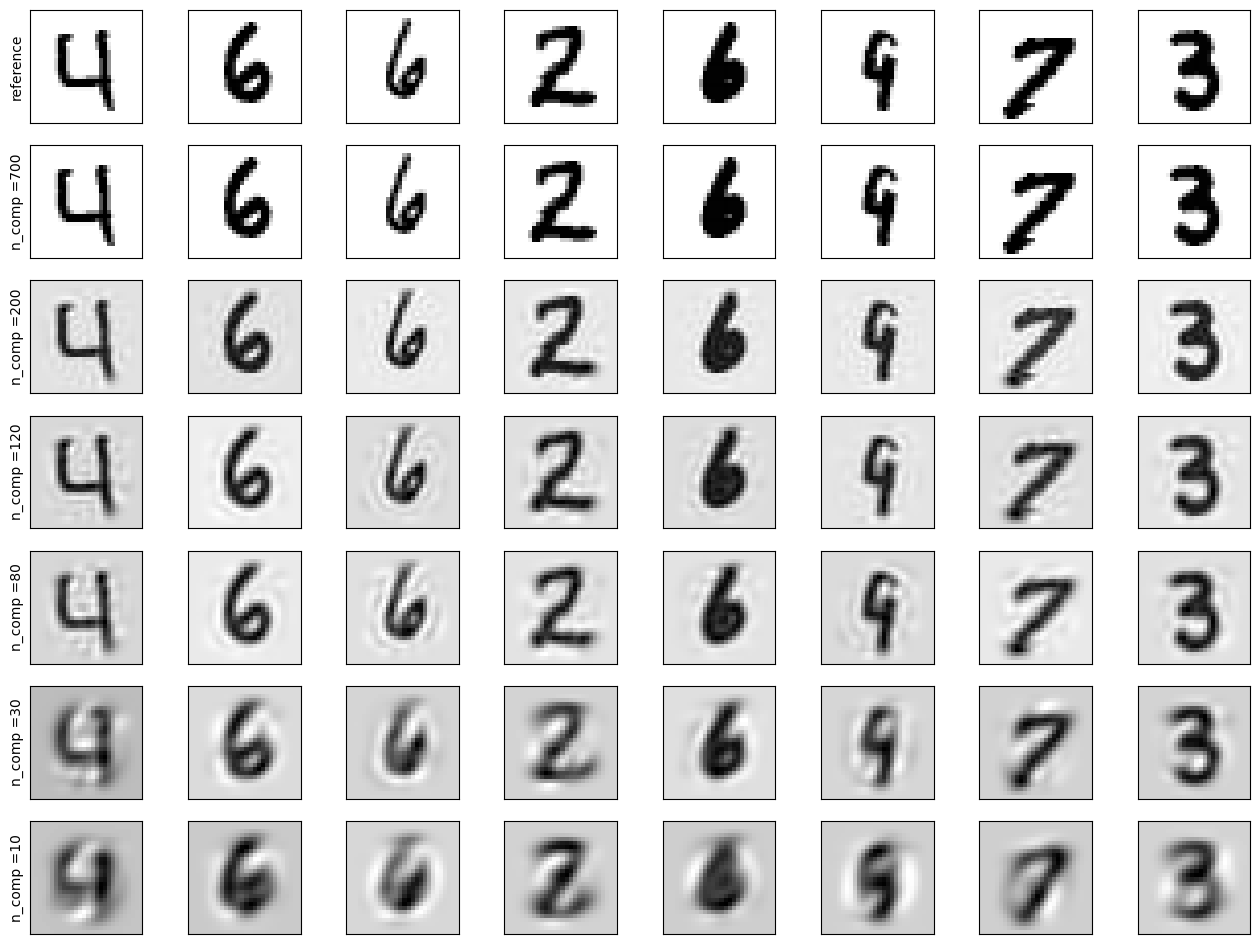

In [23]:
# Try PCA on first images
n_images = 8 
vector_of_index_values = [700,200,120,80,30,10]

n_index_values = len(vector_of_index_values)
plt.figure(figsize=(n_images*2, n_index_values*2))

current_index_value = 0
for i in range(n_images):
    plt.subplot(n_index_values+1, n_images, current_index_value*n_images+i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if i == 0:
        plt.ylabel('reference')
    plt.imshow(x_test_full[i].reshape(28,28), cmap=plt.cm.binary)     

for current_index_value in range(1,n_index_values+1):
  pca.n_components = vector_of_index_values[current_index_value-1]
  pca.fit(x_train_full)
  # compute the images of the test set reconstructed after the dimensionality reduction procedure
  # pca.transform gives the score along the principal directions
  # pca.inverse_transform maps back to the original space
  scores = pca.transform(x_test_full[:n_images])
  outputs = pca.inverse_transform(scores)
  for i in range(n_images):
      plt.subplot(n_index_values+1, n_images, current_index_value*n_images+i+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      if i == 0:
          plt.ylabel('n_comp ='+str(pca.n_components))
      plt.imshow(outputs[i].reshape(28,28), cmap=plt.cm.binary)     
    
plt.show()

**Question 4.** In which range of values are the pixels for the reconstructed images when 50 components are retained? What do you think of this result?

In [28]:
pca.n_components = 50
pca.fit(x_train_full)
scores = pca.transform(x_test_full[:n_images])
outputs = pca.inverse_transform(scores)

reconstructed_min = np.min(outputs)
reconstructed_max = np.max(outputs)

print("Range of pixel values for the reconstructed images:")
print("Minimum value:", reconstructed_min)
print("Maximum value:", reconstructed_max)


Range of pixel values for the reconstructed images:
Minimum value: -0.2942311640197848
Maximum value: 1.3403923668240003


We can notice that the values of the pixels for the reconstructed images when 50 components are retained are between -0.3 and 1.34 whereas when the number of components is higher (eg 700), the pixels are between 0 and 1. The fact that the range is beyond 0 and 1 creates this blurry effect on the images.

**Question 5.** Complete the code below to compute the scores along the first two principal components (used after this to plot the projection of the test set onto the factorial plane, by coloring each point according to its label). Can you separate the images in this representation?

In [64]:
scores = pca.transform(x_test_full)
test_scores = scores[:, :2]
print(test_scores)


[[ 0.47422597  1.85215362]
 [ 0.85262939  0.55682024]
 [-1.77662994  1.31550777]
 ...
 [-1.77593689  2.36254504]
 [-2.04827377  1.24636172]
 [-0.33829945  2.382066  ]]


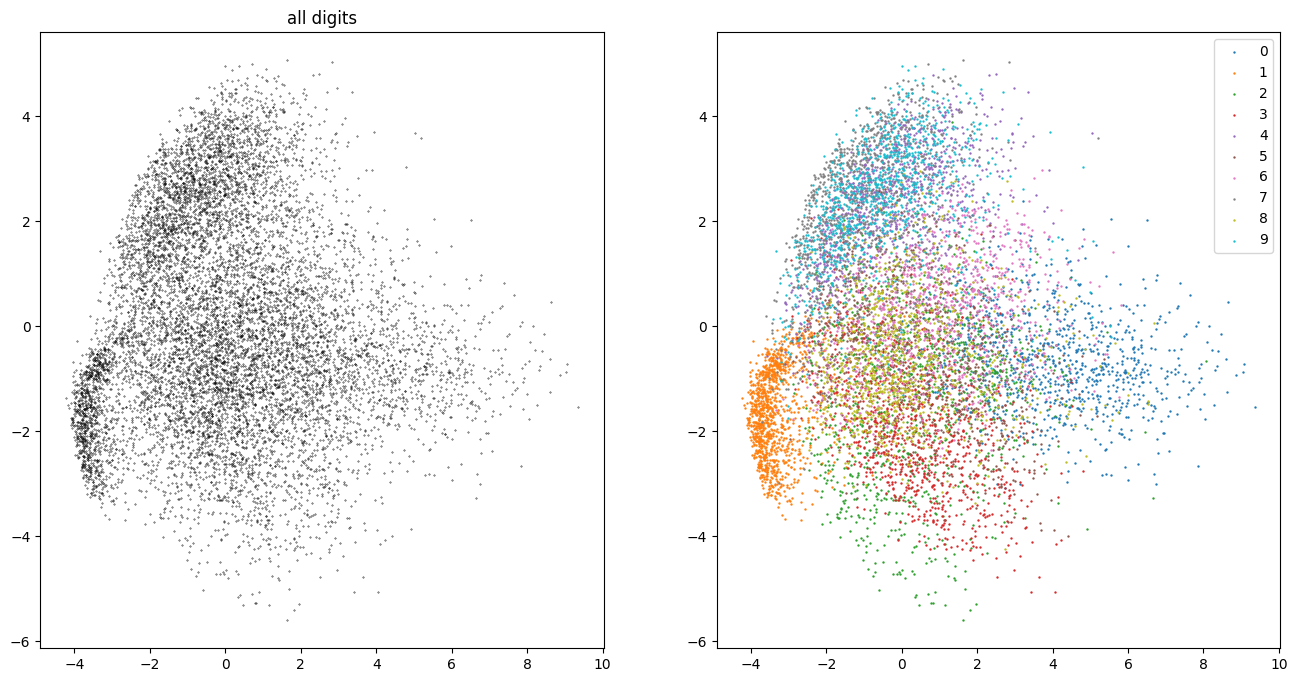

In [66]:
digits = np.arange(0,10)
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.scatter(test_scores[:,0],test_scores[:,1],s=0.1,color='black')
plt.title('all digits')
plt.subplot(1, 2, 2)
for i in digits:
    indices = np.where((y_test_full == i))
    test_scores_extracted = test_scores[indices]
    plt.scatter(test_scores_extracted[:,0],test_scores_extracted[:,1],s=0.5)
    plt.legend(digits)
    #plt.title('subset of the digits')
plt.show()


## Additional topics for project

One can revisit logistic regression after performing dimensionality reduction, and determine how the classification performance and the computational cost in training are impacted by the dimensionality reduction.
One can also check the impact of various alternative normalizations of the data (such as MinMaxScaler(), Standardize(), or other options described in the page https://scikit-learn.org/stable/modules/preprocessing.html).